# Predictive modeling: targeting offers

You have to build a predictive model for targeting offers to consumers, and conduct some model performance analytics on the result.

MultiMagazine Inc. keeps records on individuals who had been previously targeted with a direct marketing offer including their household income, the average amount sold, the frequency of their transactions, and whether or not they bought a subscription in the most recent campaign. The organization would like to use data mining techniques to build customer profile models. The data contains the following fields:

* income: customer income
* firstDate: date of first sale
* lastDate: date of last sale
* amount: average amount sold to this customer over all periods (including zeros)
* freqSales: frequency of transactions
* saleSizeCode: code of sale size
* starCustomer: indicator if it is a star customer
* lastSale: amount of last sale
* avrSale: amount of average sale
* class: whether or not customer bought a subscription

Each record corresponds to a customer and contains the customer’s attributes above. The “class” attribute indicates whether or not that customer bought a subscription in the most recent campaign.

We will use historical data on past customer responses (contained in the file directMarketing.csv) in order to build a classification model. The model can then be applied to a new set of prospective customers whom the organization may contact in a direct marketing campaign. Rather than conducting a mass marketing campaign targeting all potential prospects, the organization wishes to target only a subset of prospects who are most likely to respond positively to this offer (More generally, those who will give the organization the highest expected profit).

Using python and the package scikit-learn (http://scikit-learn.org/stable/documentation.html) build predictive models using CART (decision trees), support vector machine, naive Bayes and logistic regression to evaluate if the donor donated in this campaign. You may need to pre-process the data. Logistic regression becomes the benchmark that you will use to compare the rest of algorithms.

You must randomly split your data set using 70% and 30% of the observations for the training and test data set respectively. Your report should answer these questions using only the results of the test dataset:
* 1) Compare the different models explored using the test error rate (percent incorrectly classified), the area under the ROC curve and the confusion matrix against the benchmark (logistic regression).
* 2) Use matplotlib to plot the ROC and the precision-recall curves for your models. Discuss and compare the performance of each model according to these curves against the benchmark (logistic regression).

In [24]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import naive_bayes
from sklearn.linear_model import LogisticRegression # Import Logistic Regression classifier
from sklearn import svm # Import SVM
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Data pre-process

In [25]:
# Read the data as DataFrame
df = pd.read_csv('directMarketing.csv').dropna()
#Split dataset in features and target variable
features = ['income','firstDate','lastDate','amount','freqSales','saleSizeCode','starCustomer','lastSale','avrSale']
# Since there are six categorical feature, use the dummy variable
categorical_feature = ['income','firstDate','lastDate','freqSales','saleSizeCode','starCustomer']
X = pd.get_dummies(df[features],columns = categorical_feature) # Features
y = df['class'] # Target variable

# Split dataset into training set and test set using the ratio 70% to 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
X.head(3)


,amount,lastSale,avrSale,income_0,income_1,income_2,income_3,income_4,income_5,income_6,...,freqSales_1,freqSales_2,freqSales_3,freqSales_4,saleSizeCode_D,saleSizeCode_E,saleSizeCode_F,saleSizeCode_G,starCustomer_0,starCustomer_X
0,0.06,50,30.00,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0.16,20,20.55,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0.20,5,8.75,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


# 2. Define a classifier class

In [26]:
class classifier_model:
    def __init__(self,classifier_name,classifier_function,X_train,X_test,y_train,y_test):
        self.classifier_name = classifier_name
        self.classifier_function = classifier_function
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_pred = None
        self.machine = None
        self.y_score = None
        
    def fitting(self):
        machine = self.classifier_function()
        self.machine = machine.fit(X_train,y_train)
        
    def predict(self):
        self.y_pred = self.machine.predict(X_test)
        if self.classifier_function in [DecisionTreeClassifier,GaussianNB]:
            self.y_score = self.machine.predict_proba(X_test)[:,1]
        else:
            self.y_score = self.machine.decision_function(X_test)
    
    # Three feature for the first question
    def test_error(self):
        return 1 - metrics.accuracy_score(y_test,self.y_pred)
    
    def area_under_ROC(self):
        return metrics.roc_auc_score(y_test,self.y_score)
    
    def confusion_matrix(self):
        return metrics.confusion_matrix(y_test,self.y_pred)
    
    # ROC and Precision-recall curves for the models
    def ROC(self):
        fpr, tpr, thresholds  = metrics.roc_curve(y_test,self.y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.rcParams['font.size'] = 8
        plt.title('ROC curve for '+ self.classifier_name)
        plt.xlabel('False Positive Rate ')
        plt.ylabel('True Positive Rate ')
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.axes().set_aspect('equal')
        plt.grid(True)
        plt.show()
        
    def Pre_rec_curve(self):
        precision, recall, thresholds = metrics.precision_recall_curve(y_test,self.y_score)
        plt.figure(figsize=(8,8))
        plt.step(recall, precision, color='r', alpha=0.2,where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-recall curves for '+self.classifier_name)
        plt.axes().set_aspect('equal')
        plt.grid(True)
        plt.show()

# 3. Define the classifier object basing on the class separately
* Logistic Regression object
* Decision Tree object
* SVM object
* Naive bayes object

In [27]:
# Define a Logistic Regression object
Logistic_Regression = classifier_model('Logistic Regression',LogisticRegression,X_train,X_test,y_train,y_test)
Logistic_Regression.fitting()
Logistic_Regression.predict()

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
# Define a Decision Tree object
decision_tree = classifier_model('Decision Tree',DecisionTreeClassifier,X_train,X_test,y_train,y_test)
decision_tree.fitting()
decision_tree.predict()

In [29]:
# Define a SVM object
SVM = classifier_model('SVM',svm.SVC,X_train,X_test,y_train,y_test)
SVM.fitting()
SVM.predict()

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
# Define a Naive bayes object
naive_bayes = classifier_model('Naive bayes',GaussianNB,X_train,X_test,y_train,y_test)
naive_bayes.fitting()
naive_bayes.predict()

# 4. Give out the output for each classifier separately

In [31]:
def acc(objec):
    print(objec.classifier_name + ' output:\n' )
    print('1. The test error rate is: \n'+ str(objec.test_error()))
    print('\n')
    print('2. The area under the ROC curve is: \n' + str(objec.area_under_ROC()))
    print('\n')
    print('3. The confusion matrix is:')
    print(objec.confusion_matrix())
    print('\n')
    print('The ROC curve:')
    objec.ROC()
    print('\n')
    print('The precision-recall curves: ')
    objec.Pre_rec_curve()

Logistic Regression output:

1. The test error rate is: 
0.4146740910579758


2. The area under the ROC curve is: 
0.6124657704754792


3. The confusion matrix is:
[[913 632]
 [634 874]]


The ROC curve:


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


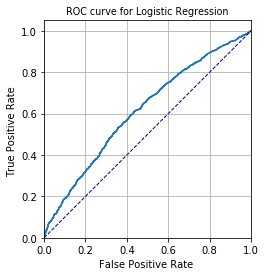



The precision-recall curves: 


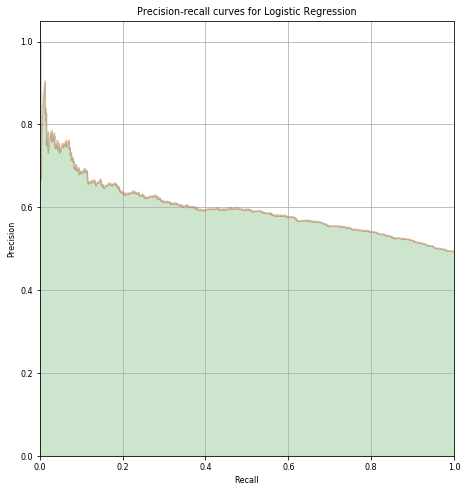

In [32]:
acc(Logistic_Regression)

Decision Tree output:

1. The test error rate is: 
0.4710121192269898


2. The area under the ROC curve is: 
0.5271323169632509


3. The confusion matrix is:
[[804 741]
 [697 811]]


The ROC curve:


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


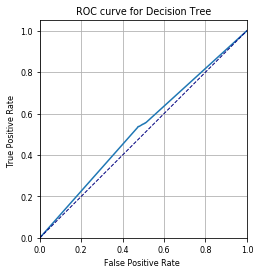



The precision-recall curves: 


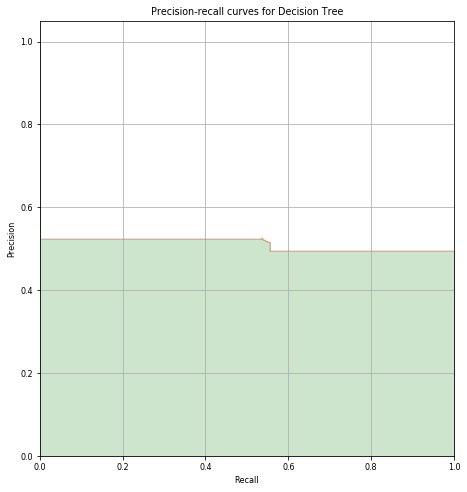

In [33]:
acc(decision_tree)

SVM output:

1. The test error rate is: 
0.42188011791680313


2. The area under the ROC curve is: 
0.608352003983072


3. The confusion matrix is:
[[857 688]
 [600 908]]


The ROC curve:


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


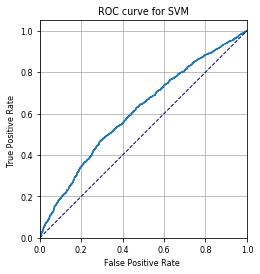



The precision-recall curves: 


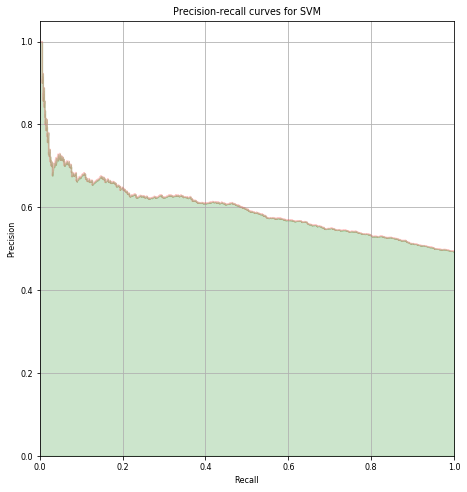

In [34]:
acc(SVM)

Naive bayes output:

1. The test error rate is: 
0.48182115951523097


2. The area under the ROC curve is: 
0.5578519739383482


3. The confusion matrix is:
[[1401  144]
 [1327  181]]


The ROC curve:


/Users/lilinsen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


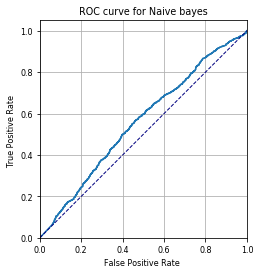



The precision-recall curves: 


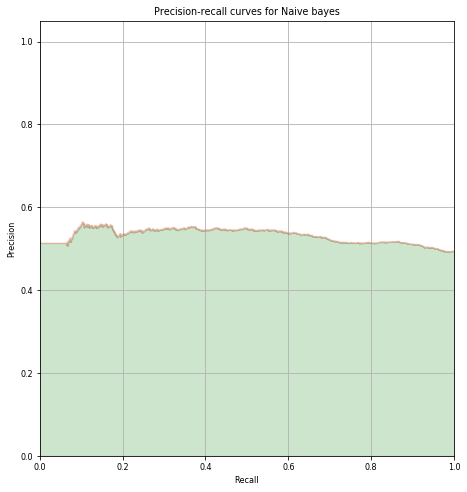

In [35]:
acc(naive_bayes)

# * * 1) Compare the different models explored using the test error rate (percent incorrectly classified), the area under the ROC curve and the confusion matrix against the benchmark (logistic regression).

In [37]:
result_df = pd.DataFrame(np.array([Logistic_Regression.test_error(),
                      decision_tree.test_error(),
                      SVM.test_error(),
                      naive_bayes.test_error()]),index = ['Logistic_Regression','decision_tree','SVM','naive_bayes'],columns = ['Test_error'])
result_df['Area_under_the_ROC'] = np.array([Logistic_Regression.area_under_ROC(),
                      decision_tree.area_under_ROC(),
                      SVM.area_under_ROC(),
                      naive_bayes.area_under_ROC()])
print(result_df)

                     Test_error  Area_under_the_ROC
Logistic_Regression    0.414674            0.612466
decision_tree          0.471012            0.527132
SVM                    0.421880            0.608352
naive_bayes            0.481821            0.557852


* From the Test_error we know the order of performance is logistic regression > SVM > Decision tree > Naive bayes  
* From the Area_under_the_ROC we can get the order of performance is logistic regression > SVM > Naive bayes  > Decision tree
* The confusion matrix we have shown above separately, we can get the information from the confusion matrix and support the conclusion we haved drawed above.

# * * 2)Compare the performance of each model according to ROC curve

/Users/lilinsen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


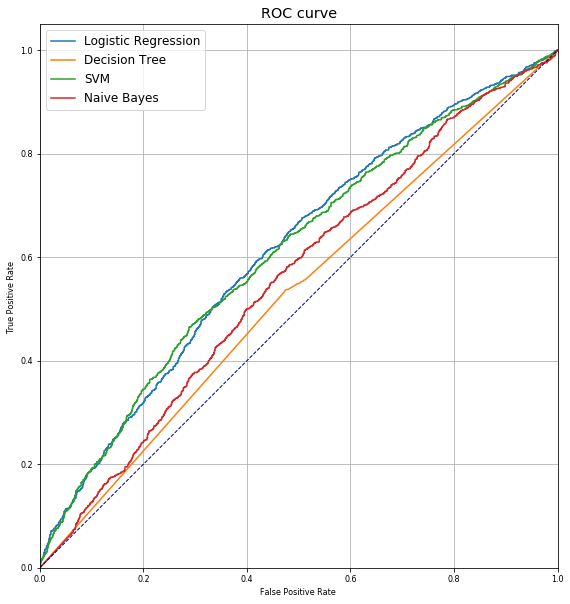

In [38]:
fpr1, tpr1, thresholds1  = metrics.roc_curve(Logistic_Regression.y_test,Logistic_Regression.y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr2, tpr2, thresholds2  = metrics.roc_curve(decision_tree.y_test,decision_tree.y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr3, tpr3, thresholds3  = metrics.roc_curve(SVM.y_test,SVM.y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr4, tpr4, thresholds4  = metrics.roc_curve(naive_bayes.y_test,naive_bayes.y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1,label="Logistic Regression")
plt.plot(fpr2, tpr2,label="Decision Tree")
plt.plot(fpr3, tpr3,label="SVM")
plt.plot(fpr4, tpr4,label="Naive Bayes")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

From the plot above, we find that the order of performance is logistic regression >  SVM > Naive bayes > Decision tree because the more upper left of the curve, the better.

# * * 3)Compare the performance of each model according to precision_recall_curve

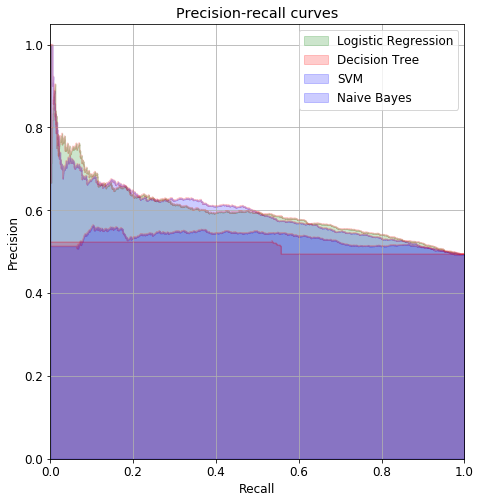

In [39]:
precision1, recall1, thresholds1 = metrics.precision_recall_curve(Logistic_Regression.y_test,Logistic_Regression.y_score)
precision2, recall2, thresholds2 = metrics.precision_recall_curve(decision_tree.y_test,decision_tree.y_score)
precision3, recall3, thresholds3 = metrics.precision_recall_curve(SVM.y_test,SVM.y_score)
precision4, recall4, thresholds4 = metrics.precision_recall_curve(naive_bayes.y_test,naive_bayes.y_score)
plt.figure(figsize=(8,8))
plt.step(recall1, precision1, color='r', alpha=0.2,where='post' )
plt.fill_between(recall1, precision1, step='post', alpha=0.2,color='g',label="Logistic Regression")
plt.step(recall2, precision2, color='r', alpha=0.2,where='post')
plt.fill_between(recall2, precision2, step='post', alpha=0.2,color='r',label="Decision Tree")
plt.step(recall3, precision3, color='r', alpha=0.2,where='post')
plt.fill_between(recall3, precision3, step='post', alpha=0.2,color='b',label="SVM")
plt.step(recall4, precision4, color='r', alpha=0.2,where='post')
plt.fill_between(recall4, precision4, step='post', alpha=0.2,color='b',label="Naive Bayes")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-recall curves')
plt.axes().set_aspect('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

We get the same result from the precision recall curve. Because the more upper right of the plot, the better. This plot also show that the order of performance is logistic regression > Naive bayes > SVM > Decision tree